In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dataset=pd.read_csv("Dataset 2.csv")
# print shape of dataset with rows and columns
print(dataset.shape)

(40964, 30)


In [ ]:
# print the top5 records 
dataset.head()

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,JVHGLD4AS0,8/10/2020 2:25,1081,869,680,1125,10750.0,69.81,34,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,JVHGLD4AS0,9/14/2020 2:30,1070,838,662,1245,10640.0,68.63,34,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,JVHCM30A00,9/14/2020 6:47,1075,882,611,1040,10750.0,66.08,36,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,JVHST01C00,9/15/2020 11:55,1088,864,603,1260,9000.0,51.94,38,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,JVHWT02A00,9/16/2020 1:14,1061,848,650,1265,9811.0,61.23,35,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41


In [ ]:
dataset.isna()

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
pd.DataFrame((dataset.isna().sum()/dataset.isna().count()).sort_values(ascending=False)).head(100)

,0
COIL_ID,0.0
GRADE,0.0
YS,0.0
UTS,0.0
V,0.0
TI,0.0
SI,0.0
S,0.0
P,0.0
NI,0.0


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  28


,COIL_ID,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,FM_EXIT_THIK,AL,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,1081,869,680,1125,10750.0,69.81,34,1.99,0.048,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,1070,838,662,1245,10640.0,68.63,34,2.05,0.051,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,1075,882,611,1040,10750.0,66.08,36,2.49,0.032,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,1088,864,603,1260,9000.0,51.94,38,4.99,0.053,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,1061,848,650,1265,9811.0,61.23,35,2.31,0.051,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41


In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<10 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 28


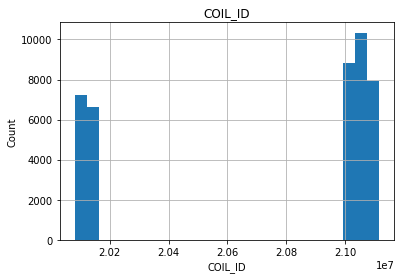

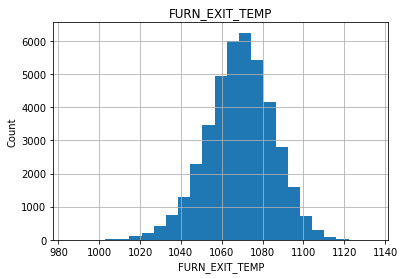

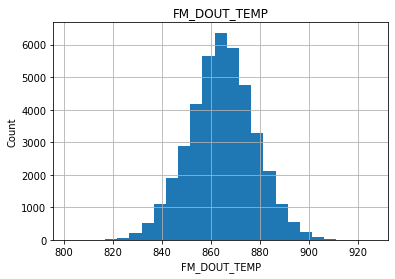

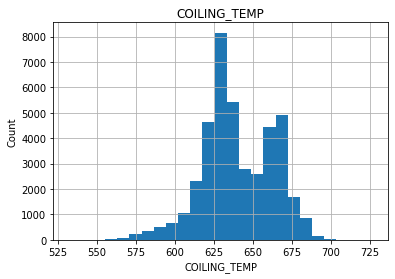

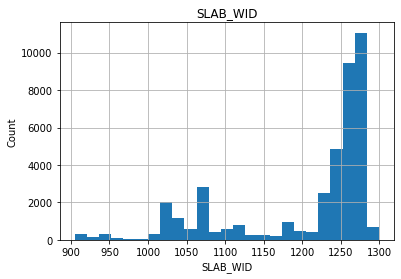

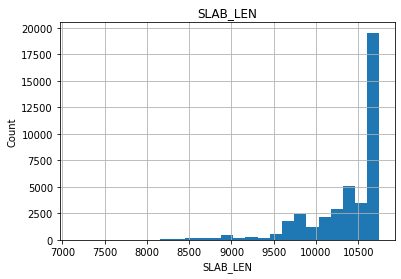

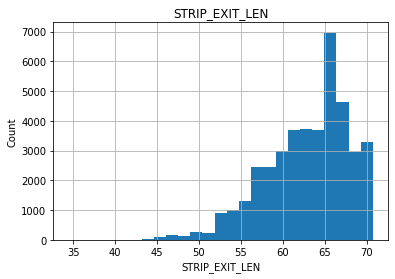

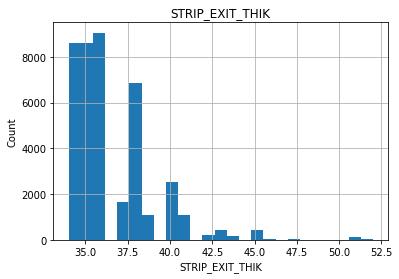

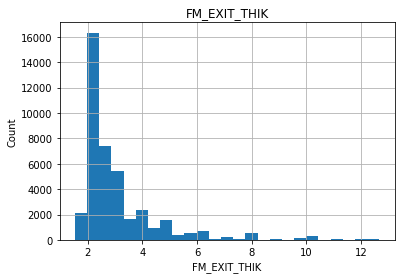

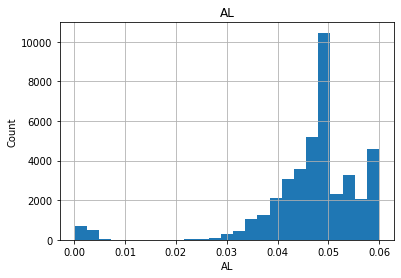

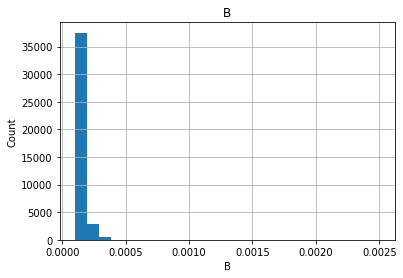

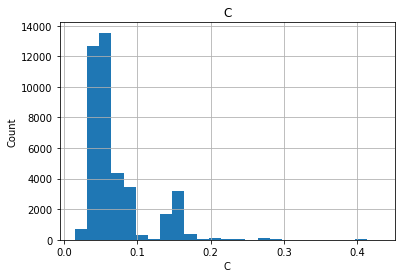

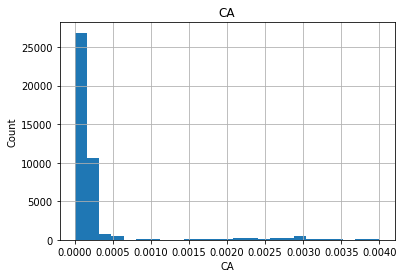

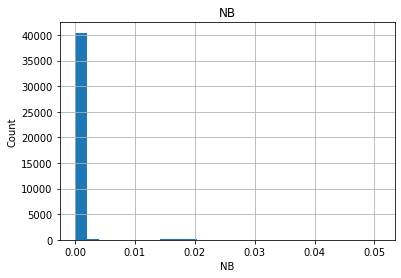

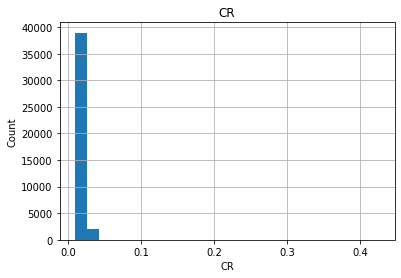

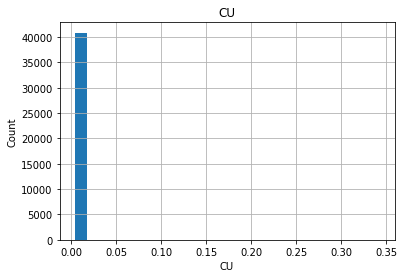

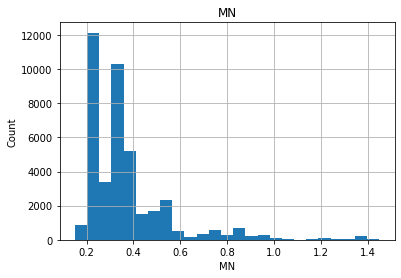

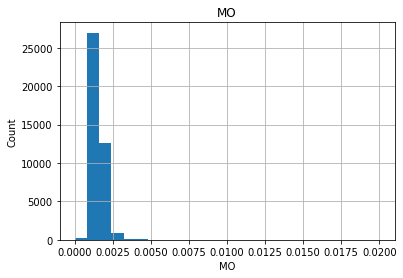

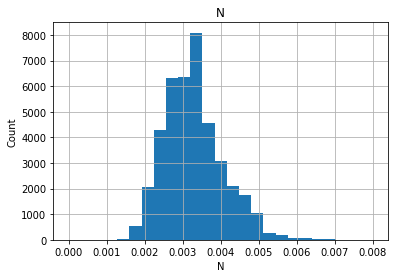

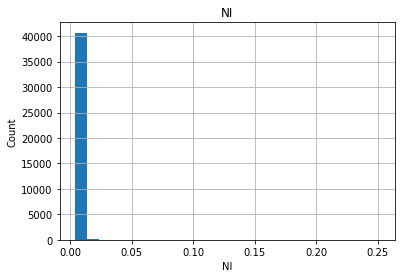

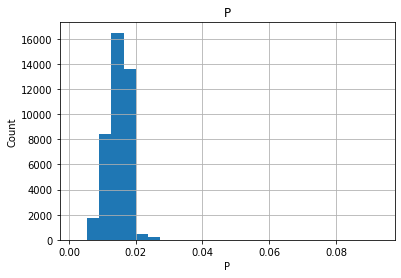

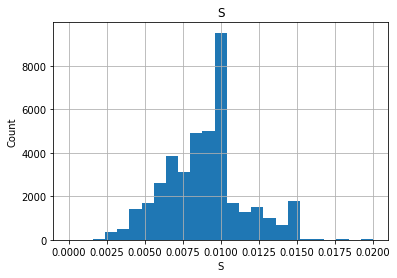

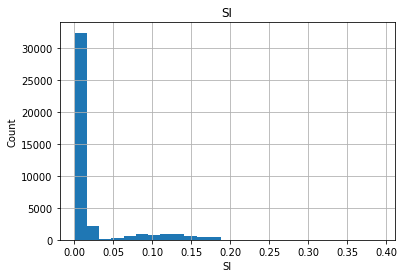

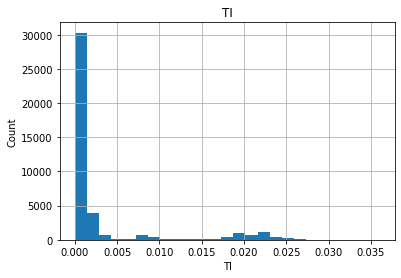

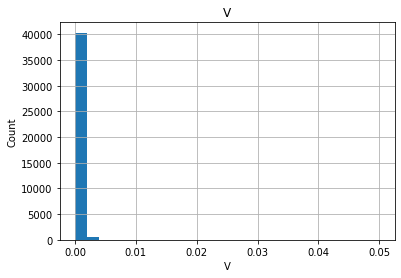

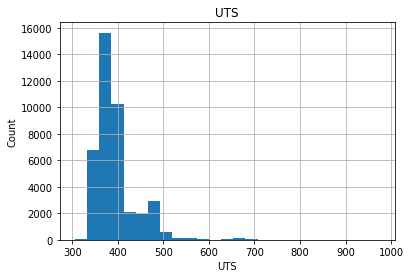

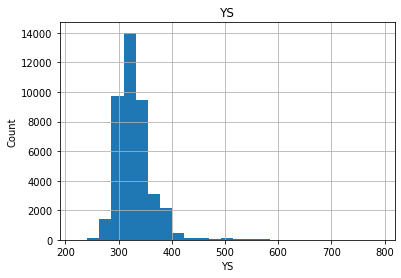

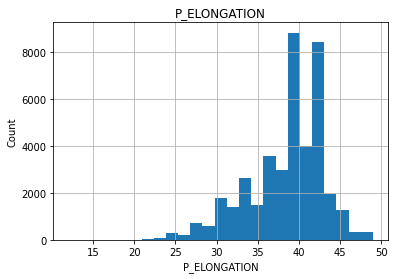

In [ ]:
#  Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

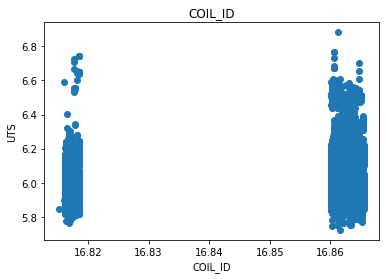

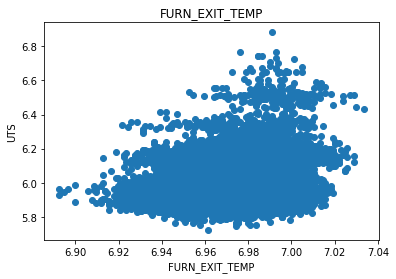

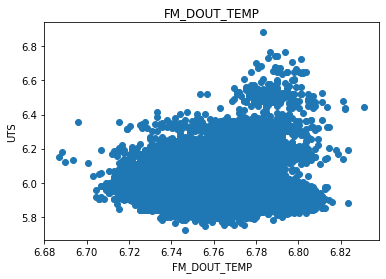

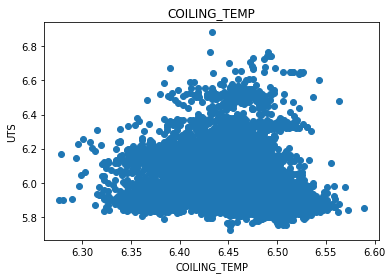

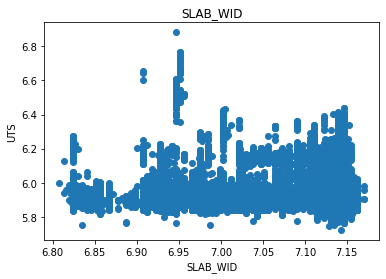

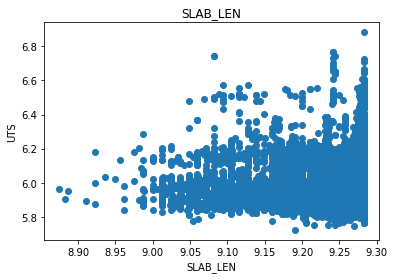

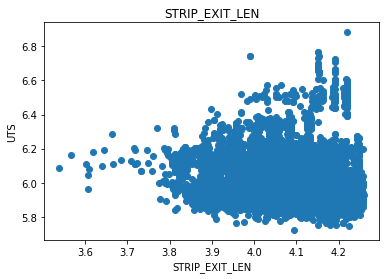

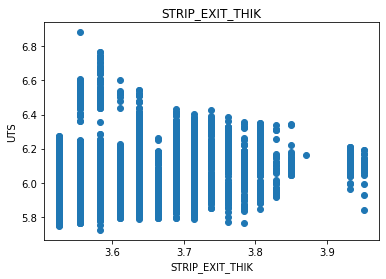

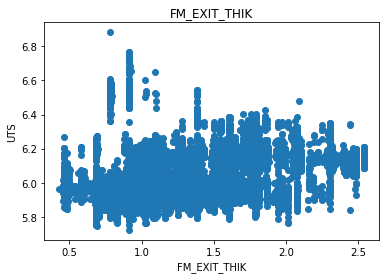

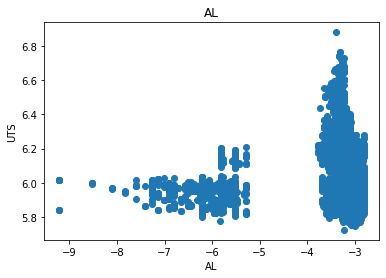

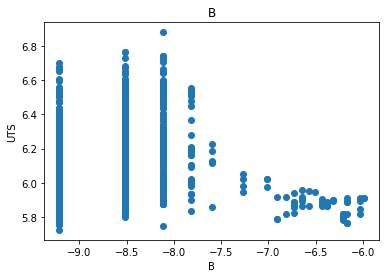

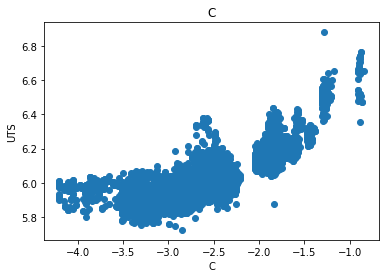

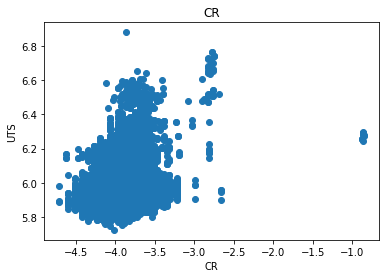

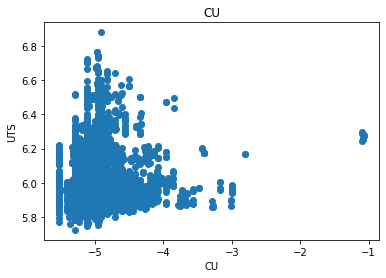

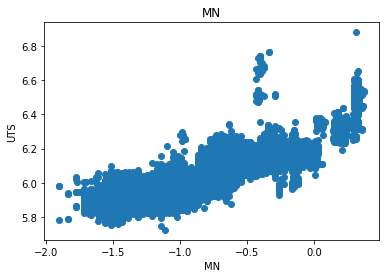

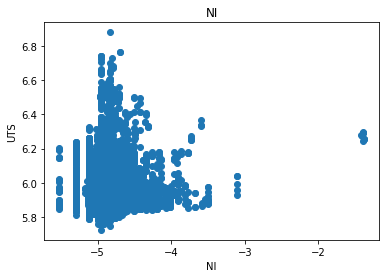

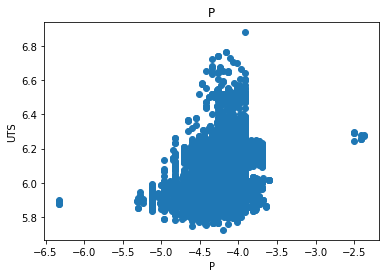

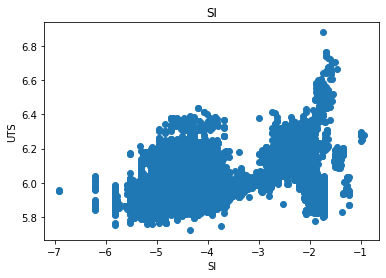

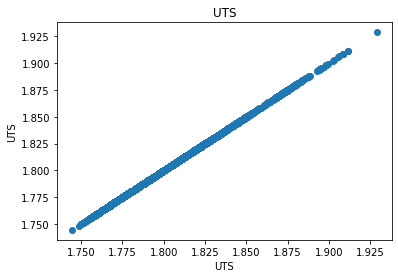

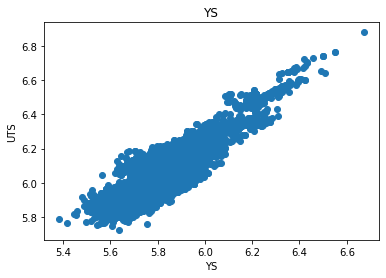

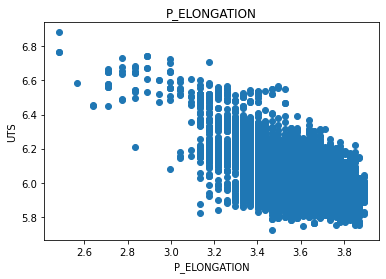

In [ ]:
# We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['UTS']=np.log(data['UTS'])
        plt.scatter(data[feature],data['UTS'])
        plt.xlabel(feature)
        plt.ylabel('UTS')
        plt.title(feature)
        plt.show()

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['GRADE', 'COIL_GEN_TIME']

In [ ]:
dataset[categorical_features].head()

,GRADE,COIL_GEN_TIME
0,JVHGLD4AS0,8/10/2020 2:25
1,JVHGLD4AS0,9/14/2020 2:30
2,JVHCM30A00,9/14/2020 6:47
3,JVHST01C00,9/15/2020 11:55
4,JVHWT02A00,9/16/2020 1:14


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is GRADE and number of categories are 110
The feature is COIL_GEN_TIME and number of categories are 40959


In [ ]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['UTS'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [ ]:
dataset.head(100)

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,JVHGLD4AS0,Rare_var,1081,869,680,1125,10750.0,69.81,34,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,JVHGLD4AS0,Rare_var,1070,838,662,1245,10640.0,68.63,34,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,Rare_var,Rare_var,1075,882,611,1040,10750.0,66.08,36,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,JVHST01C00,Rare_var,1088,864,603,1260,9000.0,51.94,38,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,JVHWT02A00,Rare_var,1061,848,650,1265,9811.0,61.23,35,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20099556,JVHGLC4AS0,Rare_var,1017,839,641,1203,8750.0,57.28,34,...,0.0023,0.008,0.010,0.0064,0.008,0.001,0.001,366,327,41
96,20099558,JVHGLD4AS0,Rare_var,1025,858,678,940,10750.0,65.42,36,...,0.0031,0.008,0.016,0.0100,0.006,0.001,0.001,355,308,43
97,20099565,JVHGLD4AS0,Rare_var,1061,872,689,940,10750.0,67.29,35,...,0.0031,0.008,0.016,0.0100,0.006,0.001,0.001,352,303,44
98,20099570,JVHGLD4AS0,Rare_var,1054,871,686,940,10750.0,67.29,35,...,0.0036,0.008,0.015,0.0100,0.009,0.001,0.001,350,302,44


In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['UTS'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['UTS','YS','P_ELONGATION']]

In [ ]:
scaling_feature

['COIL_ID',
 'GRADE',
 'COIL_GEN_TIME',
 'FURN_EXIT_TEMP',
 'FM_DOUT_TEMP',
 'COILING_TEMP',
 'SLAB_WID',
 'SLAB_LEN',
 'STRIP_EXIT_LEN',
 'STRIP_EXIT_THIK',
 'FM_EXIT_THIK',
 'AL',
 'B',
 'C',
 'CA',
 'NB',
 'CR',
 'CU',
 'MN',
 'MO',
 'N',
 'NI',
 'P',
 'S',
 'SI',
 'TI',
 'V']

In [ ]:
X=dataset.drop(['COIL_ID','UTS','YS','P_ELONGATION'],axis=1)

X

,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,FM_EXIT_THIK,...,CU,MN,MO,N,NI,P,S,SI,TI,V
0,0,0,1081,869,680,1125,10750.0,69.81,34,1.99,...,0.007,0.20,0.001,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001
1,0,0,1070,838,662,1245,10640.0,68.63,34,2.05,...,0.006,0.23,0.001,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001
2,12,0,1075,882,611,1040,10750.0,66.08,36,2.49,...,0.006,1.35,0.001,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001
3,14,0,1088,864,603,1260,9000.0,51.94,38,4.99,...,0.010,0.75,0.001,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001
4,7,0,1061,848,650,1265,9811.0,61.23,35,2.31,...,0.005,0.32,0.001,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40959,7,0,1075,870,635,1270,10700.0,69.56,34,1.99,...,0.006,0.33,0.001,0.0027,0.007,0.012,0.0086,0.007,0.001,0.001
40960,7,0,1066,878,645,1270,10700.0,69.56,34,1.99,...,0.006,0.33,0.001,0.0034,0.008,0.011,0.0063,0.015,0.008,0.001
40961,7,0,1081,873,635,1270,10700.0,69.56,34,1.99,...,0.006,0.34,0.001,0.0032,0.007,0.011,0.0045,0.017,0.001,0.001
40962,10,0,1075,894,652,1270,10700.0,62.24,38,5.78,...,0.006,0.47,0.001,0.0034,0.007,0.015,0.0064,0.018,0.001,0.001


In [ ]:
y=dataset[['UTS'
       ]].values
y

array([[346],
       [365],
       [730],
       ...,
       [389],
       [405],
       [486]])

In [ ]:
# prediction model building

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# we will now  see the effect of different number of estimators on mse

In [ ]:
# Splitting the data into a train set and a test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

n_estimators : the number of boosting stages that will be performed. Later, we will plot deviance against boosting iterations.

max_depth : limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

min_samples_split : the minimum number of samples required to split an internal node.

learning_rate : how much the contribution of each tree will shrink.

loss : loss function to optimize. The least squares function is used in this case however, there are many other options

In [ ]:
GB=GradientBoostingRegressor(**params)

In [ ]:
GB.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
y_pred=GB.predict(X_test)

In [ ]:
y_pred

array([358.7867603 , 360.26356444, 476.14937264, ..., 393.32207969,
       386.317832  , 361.99215045])

In [ ]:
GB.score(X_test, y_test)

0.9327788769848911

In [ ]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
rmse=float(format(np.sqrt(mean_squared_error(y_pred,y_test)),'.3f'))


In [ ]:
rmse

12.144

In [ ]:
from sklearn.model_selection import cross_val_score
GB_accuracies = cross_val_score(estimator = GB, X = X_train, y = y_train, cv = 4)
print("Mean_GB_Acc : ", GB_accuracies.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Mean_GB_Acc :  0.9322458523107797


In [ ]:
# finding the best estimators with gridsearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=GradientBoostingRegressor()

In [ ]:
Parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid = GridSearchCV(estimator=model, param_grid = Parameters, cv = 2, n_jobs=-1)


In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10], 'n_estimators': [100, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9422909132220267

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}


In [ ]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
rmse=float(format(np.sqrt(mean_squared_error(y_pred,y_test)),'.3f'))

In [ ]:
rmse

12.144

In [ ]:
# above model provides RMSE :12.143 by using all the features

In [ ]:
X=dataset[['FM_DOUT_TEMP','STRIP_EXIT_LEN','C','NB','COILING_TEMP','MN','P','TI','CR','SI','FM_EXIT_THIK','GRADE','N']]

In [ ]:
X.head()

,FM_DOUT_TEMP,STRIP_EXIT_LEN,C,NB,COILING_TEMP,MN,P,TI,CR,SI,FM_EXIT_THIK,GRADE,N
0,869,69.81,0.0335,0.001,680,0.20,0.018,0.001,0.018,0.004,1.99,0,0.0025
1,838,68.63,0.0385,0.001,662,0.23,0.014,0.001,0.016,0.007,2.05,0,0.0022
2,882,66.08,0.2809,0.001,611,1.35,0.015,0.002,0.020,0.164,2.49,12,0.0070
3,864,51.94,0.1554,0.001,603,0.75,0.021,0.002,0.022,0.099,4.99,14,0.0035
4,848,61.23,0.0610,0.001,650,0.32,0.015,0.001,0.015,0.006,2.31,7,0.0032


In [ ]:
y=dataset[['UTS']].values

In [ ]:
y

array([[346],
       [365],
       [730],
       ...,
       [389],
       [405],
       [486]])

In [ ]:
# splitting the dataset into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
X_train.shape

(32771, 13)

In [ ]:
X_test.shape

(8193, 13)

In [ ]:
y_train.shape

(32771, 1)

In [ ]:
y_test.shape

(8193, 1)

In [ ]:
# prediction model building:gradient_boosting_model

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# we will now see the effect of different number of estimators on mse

In [ ]:
GB=GradientBoostingRegressor(**params)

In [ ]:
GB.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
y_pred=GB.predict(X_test)

In [ ]:
y_pred

array([358.83472805, 360.16661077, 475.95476673, ..., 393.71790379,
       386.12649494, 361.93217298])

In [ ]:
GB.score(X_test, y_test)

0.932386139119775

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse=float(format(np.sqrt(mean_squared_error(y_pred,y_test)),'3f'))

In [ ]:
rmse

12.179212

In [ ]:
from sklearn.model_selection import cross_val_score
GB_accuracies = cross_val_score(estimator = GB, X = X_train, y = y_train, cv = 8)
print("Mean_GB_Acc : ", GB_accuracies.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Mean_GB_Acc :  0.9319964036886716


In [ ]:
# finding the best estimators with grid searchcv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=GradientBoostingRegressor()

In [ ]:
Parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid = GridSearchCV(estimator=model, param_grid = Parameters, cv = 2, n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10], 'n_estimators': [100, 500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.940360288184851

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}


In [ ]:
from sklearn.metrics import mean_squared_error
# for calculating the cost function

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred)

8.511939102748977

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

148.3332025120752

In [ ]:
rmse=float(format(np.sqrt(mean_squared_error(y_pred,y_test)),'.3f'))

In [ ]:
rmse

12.179

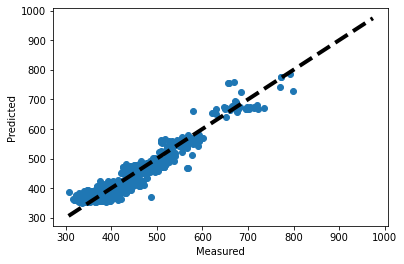

In [91]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()